In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"/Users/sudeince/Desktop/data science/password_resources/password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
data.drop(["index"] , axis=1 , inplace =True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [11]:
data.isnull().any().sum()

0

In [12]:
data.dtypes

password    object
strength     int64
dtype: object

In [13]:
data["strength"].unique()

array([1, 2, 0])

In [14]:
data["password"][0]

'zxe870819'

In [15]:
type(data["password"][0])

str

In [16]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [17]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [18]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [19]:
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [20]:
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [21]:
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [22]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [23]:
import string

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def find_sementics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [26]:
data["password"].apply(find_sementics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [27]:
data[data["password"].apply(find_sementics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [28]:
len(data["password"][0])

9

In [29]:
data["length"] = data["password"].str.len()

In [200]:
password = "Sude123."

In [202]:
[char for char in password if char.islower()]

['u', 'd', 'e']

In [204]:
len([char for char in password if char.islower()])

3

In [206]:
len([char for char in password if char.islower()])/len(password)

0.375

In [208]:
def freq_lowercase(row):
    return len([char for char in password if char.islower()])/len(row)

In [210]:
def freq_uppercase(row):
    return len([char for char in password if char.isupper()])/len(row)

In [212]:
def freq_numerical_case(row):
    return len([char for char in password if char.isdigit()])/len(row)

In [214]:
np.round(data["password"].apply(freq_lowercase) , 3)

0        0.333
1        0.250
2        0.333
3        0.130
4        0.375
         ...  
99995    0.300
99996    0.300
99997    0.333
99998    0.333
99999    0.273
Name: password, Length: 100000, dtype: float64

In [216]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [218]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.111,0.333,0.0
1,xw46454nr23l,1,12,0.250,0.083,0.250,0.0
2,soporte13,1,9,0.333,0.111,0.333,0.0


In [220]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)        

In [222]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)

In [224]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.111,0.333,0
1,xw46454nr23l,1,12,0.250,0.083,0.250,0
2,soporte13,1,9,0.333,0.111,0.333,0
3,accounts6000webhost.com,2,23,0.130,0.043,0.130,1
4,c443balg,1,8,0.375,0.125,0.375,0


In [226]:
data["special_char_freq"] = data["special_char_freq"]/data["length"]

In [228]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.111,0.333,0.000000
1,xw46454nr23l,1,12,0.250,0.083,0.250,0.000000
2,soporte13,1,9,0.333,0.111,0.333,0.000000
3,accounts6000webhost.com,2,23,0.130,0.043,0.130,0.043478
4,c443balg,1,8,0.375,0.125,0.375,0.000000


In [230]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [232]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean", "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [234]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                 0.429  3.000  0.461267  0.429
1                 0.231  0.375  0.317794  0.333
2                 0.014  0.214  0.190040  0.188


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                 0.143  1.000  0.153903  0.143
1                 0.077  0.125  0.105907  0.111
2                 0.005  0.071  0.062918  0.062


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [236]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

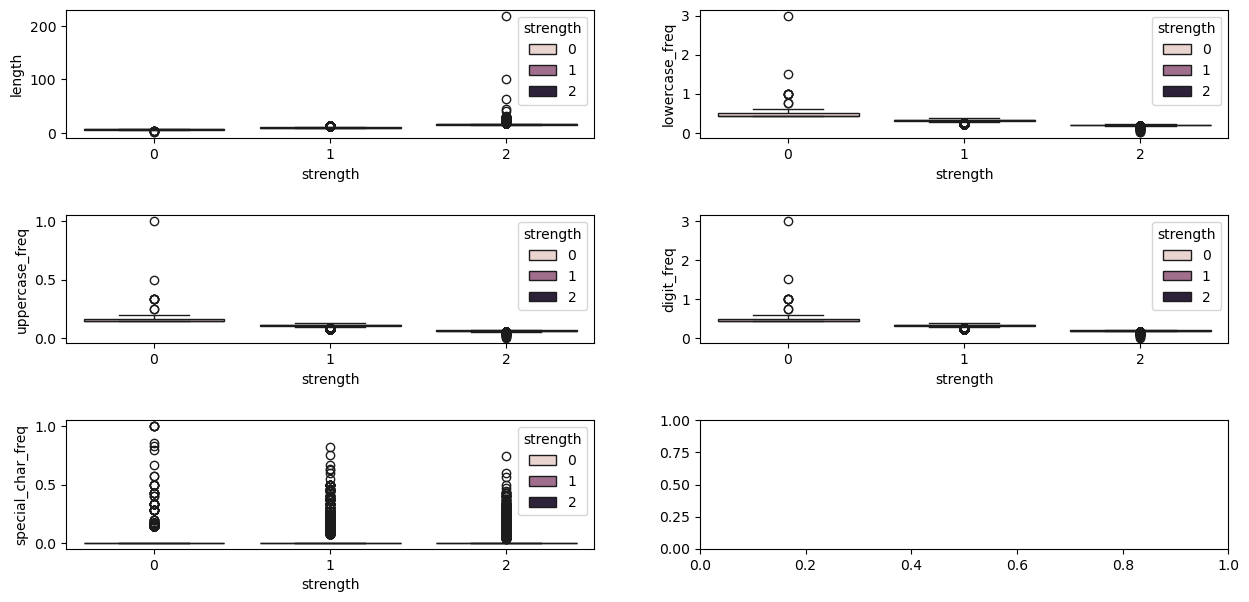

In [238]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [241]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [243]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [245]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

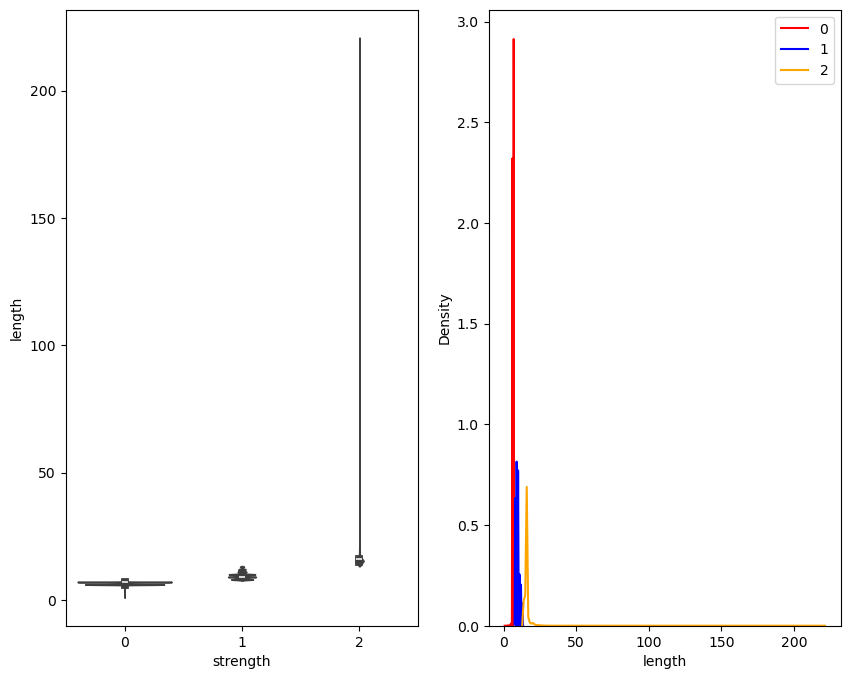

In [247]:
get_dist(data , "length")

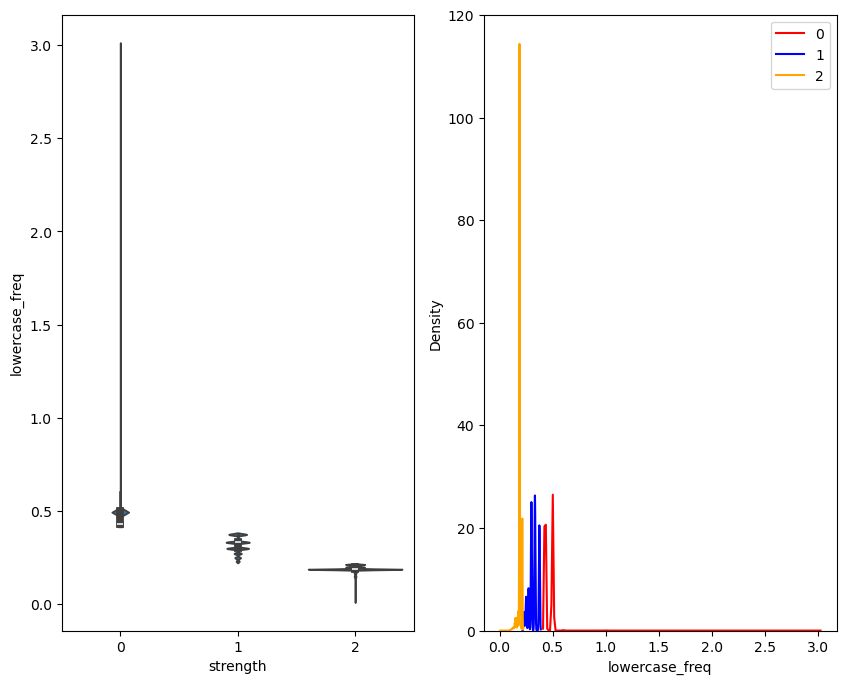

In [248]:
get_dist(data , "lowercase_freq")

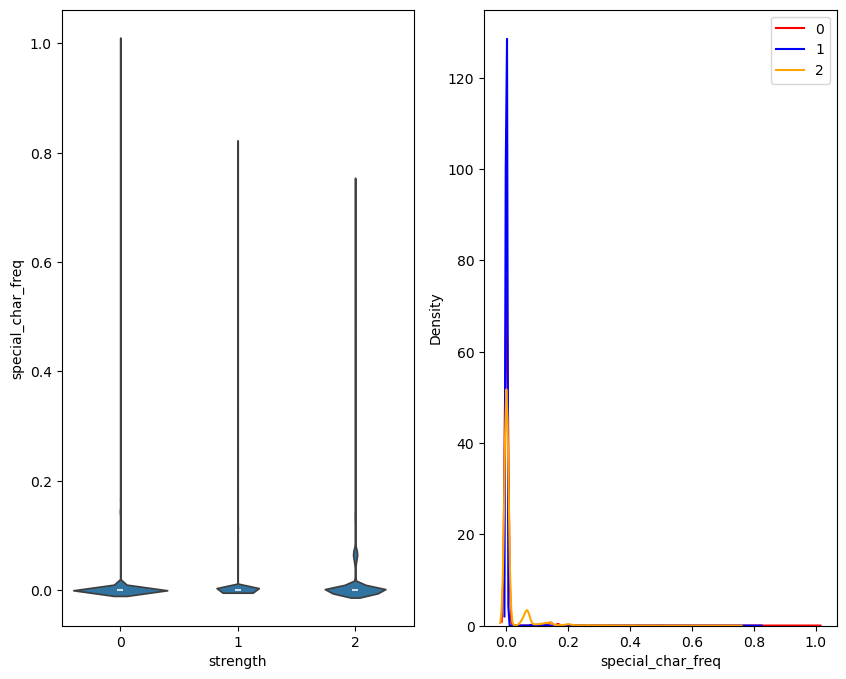

In [250]:
get_dist(data , "special_char_freq")

In [252]:
dataFrame = data.sample(frac=1)

In [255]:
dataFrame["password"]

10521              kkai22
84097    ESlJIqjE4MAT4Glk
73508            LORODO00
40648         blowfau1411
39806            our99033
               ...       
432      FzAhuvTQ1NQvnX7g
49666           anugrah13
26882          falsterbo1
65067            syjuc268
86213           123456mdt
Name: password, Length: 100000, dtype: object

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [260]:
vectorizer = TfidfVectorizer(analyzer="char")

In [262]:
X = vectorizer.fit_transform(dataFrame["password"])


In [263]:
X.shape

(100000, 99)

In [264]:
dataFrame["password"].shape

(100000,)

In [268]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [270]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [272]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [274]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
df2["length"] =dataFrame["length"]
df2["lowercase_freq"] =dataFrame["lowercase_freq"]

In [278]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.250
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.130
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.300
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.300
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333


In [281]:
y = dataFrame["strength"]

In [283]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [287]:
X_train.shape

(80000, 101)

In [291]:
from sklearn.linear_model import LogisticRegression

In [293]:
clf = LogisticRegression(multi_class="multinomial")

In [295]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [296]:
y_pred = clf.predict(X_test) 

In [299]:
from collections import Counter 

In [300]:
Counter(y_pred)

Counter({1: 17204, 2: 1694, 0: 1102})

In [303]:
password = "sude123!"

In [304]:
sample_array = np.array([password])

In [315]:
sample_matrix = vectorizer.transform(sample_array)

In [319]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7682524 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.19267018, 0.22291006, 0.24966023, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.27947402, 0.21736168, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25279449, 0.        , 0.26718991, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [321]:
sample_matrix.toarray().shape

(1, 99)

In [325]:
password

'sude123!'

In [327]:
len(password)

8

In [329]:
[char for char in password if char.islower()]

['s', 'u', 'd', 'e']

In [331]:
len([char for char in password if char.islower()])/len(password)

0.5

In [333]:
np.append(sample_matrix.toarray() , (8 , 0.5))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.7682524 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19267018, 0.22291006, 0.24966023, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.27947402, 0.21736168, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25279449, 0.        , 0.26718991, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [335]:
np.append(sample_matrix.toarray() , (8 , 0.5)).shape

(101,)

In [341]:
new_matrix = np.append(sample_matrix.toarray() , (8 , 0.5)).reshape(1,101)

In [343]:
clf.predict(new_matrix)

array([0])

In [351]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix)

    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is normal"
    else:
        return "Password is strong"

In [353]:
predict()

Enter a password :  sude123!.zxS


'Password is weak'

In [357]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [363]:
accuracy_score(y_test, y_pred)

0.7915

In [365]:
confusion_matrix(y_test , y_pred) 

array([[  569,  2201,     6],
       [  456, 13915,   342],
       [   77,  1088,  1346]])

In [ ]:
print(classification_report(y_test, y_pred)